### Практическая работа № 1
#### Жарова Мария, группа Б05-903

## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: Порядок точности метода - это наибольшая степень полинома, для которой данный метод даёт точное решение задачи.

Т.е. если ошибка метода $\varepsilon = o(h^p),$ то $p$ здесь - порядок точности метода.

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: В аппроксимационной формуле мы получим $N$ слагаемых $\Rightarrow$ для получения $N$ уравнений в окрестности каждой данной точки нам необходимо будет произвести разложение в ряд Тейлора до $N-$го порядка. Таким образом, подставив данные разложения в аппроксимационную формулу, получим ошибку метода в виде членов $N-$го порядка, делённых на h - т.е. $o(h^{N-1}).$

В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: Такая матрица называется матрицей Вандермонда. 

Если все элементы на второй строке такой матрицы различны $\Leftrightarrow det(A)\neq 0\Rightarrow rg(A) = rg(A|b)\Rightarrow$ по теореме Кронекера-Капелли $\exists !$ решение системы $A\alpha = b.$

In [1]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l, m, n) # одномерный массив из указанного количества элементов, значения которых равномерно распределенны внутри заданного интервала
    A = np.fliplr(np.vander(v, v.size)).T # перестановка столбцов массива в обратном порядке
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A, b)
    diff = 1 / h * alpha.dot(u.T)
    return diff

p = 4 # порядок точности метода
a = np.pi / 3
b = np.pi / 2
h = (b - a) / p
print('h = ', h)
x = np.linspace(a, b, p + 1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252225


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

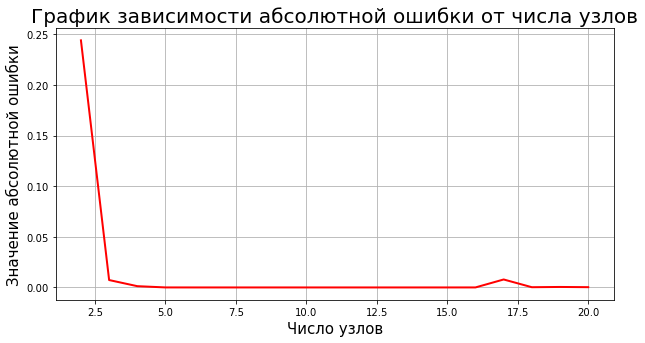

In [26]:
""" 
    N - максимальное число узлов внутри диапазона, N > 2;
    a, b - начало и конец диапазона.
    Функция рисует график зависимости абсолютной ошибки от числа узлов для МНК, 
    значения производных сравниваем для первого узла, функция sin(x).
"""
def show_abs_error_of_nodes_sin(N, a, b):
    nodes = [] # список для числа узлов
    abs_err = [] # список для записи абсолютных ошибок
    for i in range(1, N):
        x = np.linspace(a, b, i + 1)
        u = np.sin(x)
        h_i = (b - a) / i
        nodes.append(i + 1)
        abs_err.append(abs(np.cos(a) - get_diff(u, 0, i, h_i)))
    # построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(nodes, abs_err, color='red', linewidth=2)
    plt.grid(True)
    plt.title("График зависимости абсолютной ошибки от числа узлов", fontsize=20)
    plt.xlabel("Число узлов", fontsize=15)
    plt.ylabel("Значение абсолютной ошибки", fontsize=15)
    plt.show()
    
show_abs_error_of_nodes_sin(20, np.pi / 3, np.pi / 2)

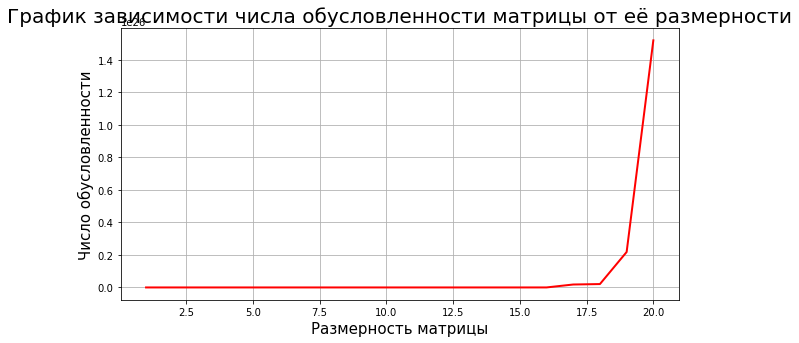

In [27]:
""" 
    N - максимальное число узлов;
    a, b - начало и конец диапазона.
    Функция строит график зависимости числа обусловленности матрицы от её размерности.
"""
def show_cond_of_dim_sin(N, a, b):
    dim = [] # список для размерности
    cond = [] # список для числа обусловленности
    for i in range(N):
        x = np.linspace(a, b, i + 1)
        u = np.sin(x)
        # расчёт числа обусловленности:
        y = np.linspace(0, i, u.size)
        A = np.fliplr(np.vander(y, y.size)).T
        cond.append(np.linalg.cond(A, p=np.inf))
        dim.append(u.size)
    # построение графика
    plt.figure(figsize=(10, 5))
    plt.plot(dim, cond, color='red', linewidth=2)
    plt.grid(True)
    plt.title("График зависимости числа обусловленности матрицы от её размерности", fontsize=20)
    plt.xlabel("Размерность матрицы", fontsize=15)
    plt.ylabel("Число обусловленности", fontsize=15)
    plt.show()

show_cond_of_dim_sin(20, np.pi / 3, np.pi / 2)

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

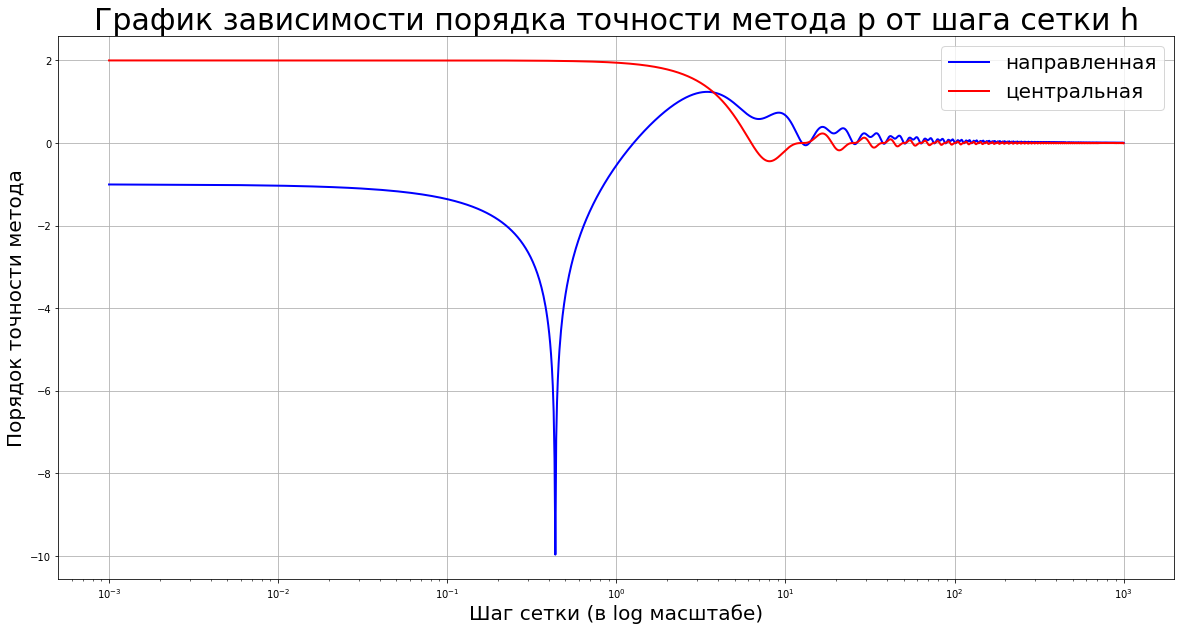

In [32]:
""" 
    h, H - минимальное и максимальное значения шага сетки, с которыми работаем;
    dh - приращение, которое будем прибавлять на каждом шаге.
    Функция строит график зависимости порядка точности метода от шага сетки
    для методов направленная разность и центральная разность.
"""
def show_ph_dir_centr(h, H, dh):
    h_lst   = [] # список для значений сеточного шага
    p_dir = [] # список для значений порядка точности метода направленная разность
    p_centr = [] # список для значений порядка точности метода центральная разность
    while (h < H):
        h_lst.append(h)
        p_dir.append(np.log2(abs((np.cos(a) - (np.sin(a + h) - np.sin(a)) / h) /
                        np.cos(a) - (np.sin(a + h / 2) - np.sin(a)) / (h / 2))))
        p_centr.append(np.log2(abs((np.cos(a) - (np.sin(a + h) - np.sin(a - h)) / (2 * h)) /
                          (np.cos(a) - (np.sin(a + h / 2) -np.sin(a - h / 2)) / h))))
        h += dh
    # построение графика
    plt.figure(figsize=(20, 10))
    plt.plot(h_lst, p_dir, color='blue', linewidth=2, label = 'направленная')
    plt.plot(h_lst, p_centr, color='red', linewidth=2, label = 'центральная')
    plt.grid(True)
    plt.title("График зависимости порядка точности метода p от шага сетки h", fontsize=30)
    plt.xlabel('Шаг сетки (в log масштабе)', fontsize=20)
    plt.ylabel('Порядок точности метода', fontsize=20)
    plt.xscale('log')
    plt.legend(loc='upper right', prop={'size':20})
    plt.show()
    
show_ph_dir_centr(0.001, 1000, 0.005)

Объяснение поведения графиков: при достаточно малых $h$ мы можем считать, что константы в выражении для ошибки метода примерно одинаковые; тогда в формуле для порядка точности $p$ их отношение будет близко к единице - это соответствует горизонтальным участкам обоих графиков (в коде записано выражение для $p$ как раз с учётом этого, поэтому можно сказать, что данный скрипт и подход применим для области малых значений h).
Интересен резкий провал в графике для направленной разности: если пропотенциировать выражение для $p$, то выходит, что отошение $$\frac{cos(a) - \frac{sin(a+h) - sin(a)}{h}}{cos(a) - \frac{sin(a+h/2) - sin(a)}{h/2}}\rightarrow 0$$
А дальше идёт область "затухающих колебаний" для графиков обоих методов - выражения под логарифмами для обоих методов стремятся к 1 - т.е. уже нет смысла применять их на практике при таких больших $h.$ 

## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [12]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html
import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000